> Muhammad Mustafa 25850354

> Zunaira Zunaira  10931968

>Zalfa Mohayyudin 12749927

## **Problem Sheet 6**

**Exercise 6.1**

1- Load point clouds + compute mean, std, and histograms.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
# Load data
npzfile = np.load('points.npz')
data = npzfile['data']  # shape (100, 1000)

# Compute statistics and histograms
means = np.mean(data, axis=1)
stds = np.std(data, axis=1)

# Histogram setup
bin_edges = np.linspace(-5, 5, 51)  # 50 bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
histograms = []

for cloud in data:
    hist, _ = np.histogram(cloud, bins=bin_edges, density=True)
    histograms.append(hist)

histograms = np.array(histograms)  # shape (100, 50)

In [14]:
# Applying PCA
pca = PCA()
hist_pca = pca.fit_transform(histograms)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

 2: Applying PCA on 50D histogram vectors.
 
 #### Task: Perform PCA on the 100 histograms (shape: 100×50)

In [15]:
# Apply PCA
pca = PCA()
hist_pca = pca.fit_transform(histograms)

3: Plot spectrum & cumulative variance.

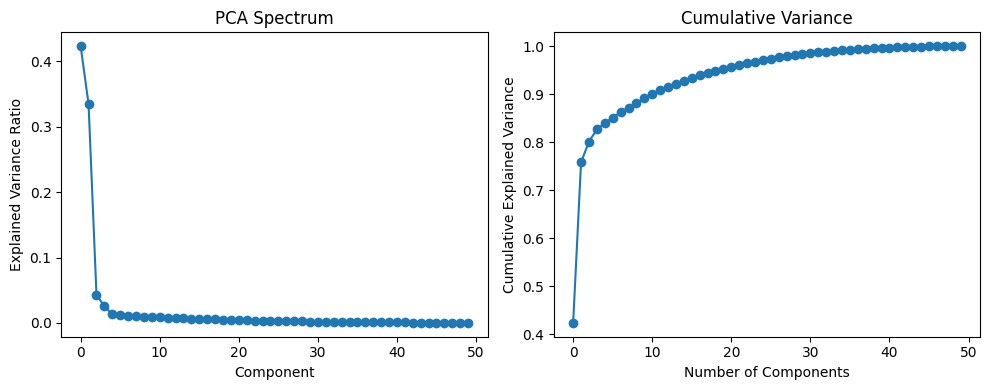

In [16]:
# Plot spectrum (eigenvalues)

plt.figure(figsize=(10, 4))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('PCA Spectrum')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')

# Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

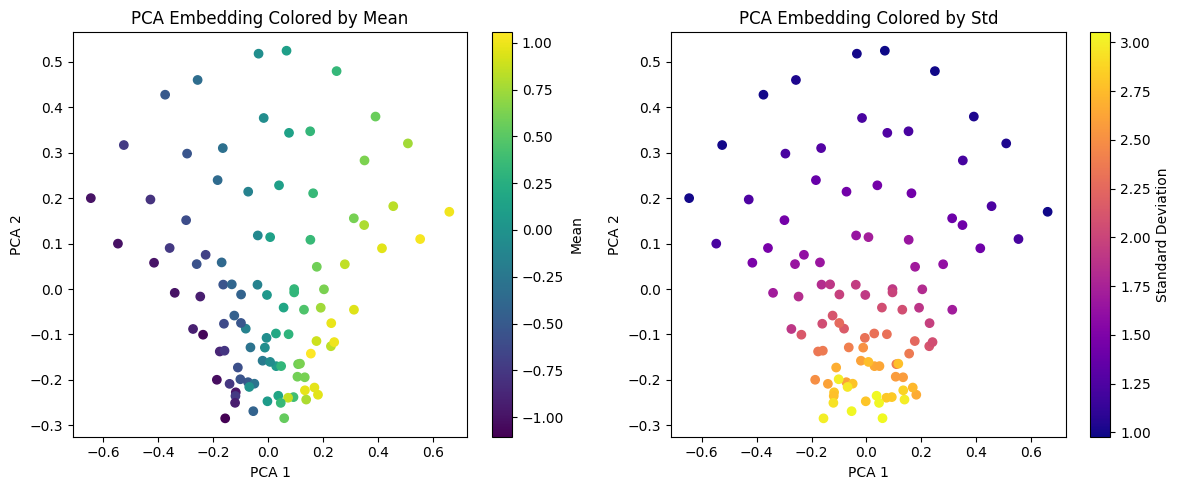

In [17]:
# 2D PCA projection
pca_2d = PCA(n_components=2)
hist_pca_2d = pca_2d.fit_transform(histograms)

# Plot PCA 2D colored by mean
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(hist_pca_2d[:, 0], hist_pca_2d[:, 1], c=means, cmap='viridis')
plt.colorbar(label='Mean')
plt.title("PCA Embedding Colored by Mean")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Colored by std
plt.subplot(1, 2, 2)
plt.scatter(hist_pca_2d[:, 0], hist_pca_2d[:, 1], c=stds, cmap='plasma')
plt.colorbar(label='Standard Deviation')
plt.title("PCA Embedding Colored by Std")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()


5: Interactive 2D PCA plot + histogram reconstruction

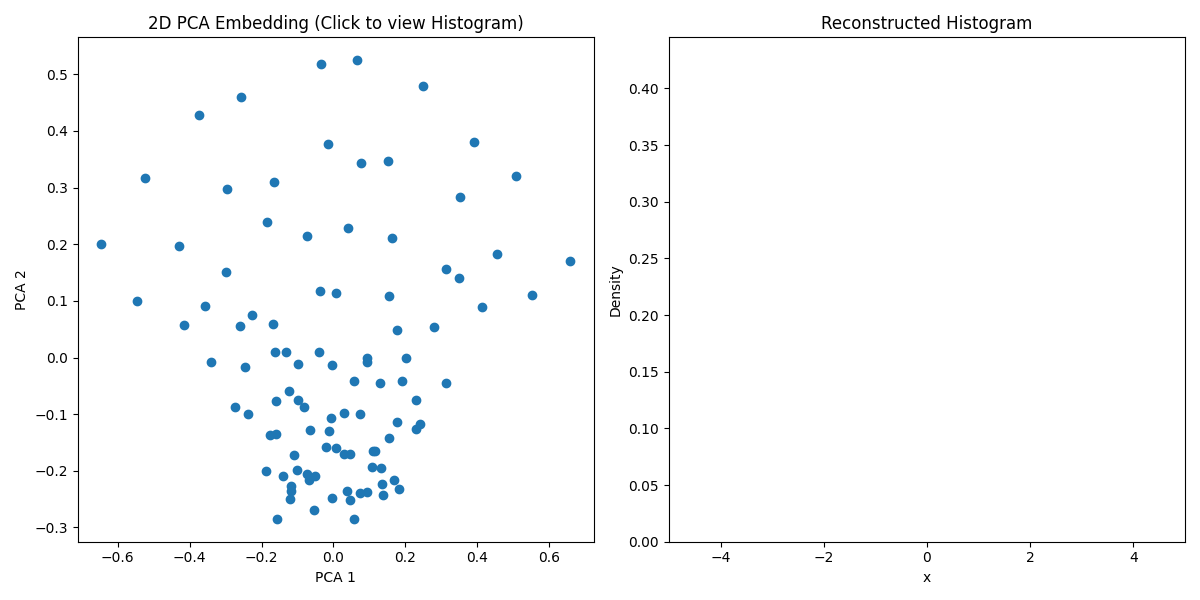

In [29]:
# Inverse transform for interactive histogram viewing
%matplotlib widget
pca_full = PCA()
hist_pca_full = pca_full.fit_transform(histograms)

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sc = ax1.scatter(hist_pca_full[:, 0], hist_pca_full[:, 1])
ax1.set_title('2D PCA Embedding (Click to view Histogram)')
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')

# Right plot for histogram
line1, = ax2.plot([], [], label='Reconstructed Histogram')
ax2.set_xlim(-5, 5)
ax2.set_ylim(0, np.max(histograms))
ax2.set_title('Reconstructed Histogram')
ax2.set_xlabel('x')
ax2.set_ylabel('Density')

# Click event handler
def on_click(event):
    if event.inaxes != ax1:
        return

    # Get clicked point
    coords = np.array([event.xdata, event.ydata])
    distances = np.linalg.norm(hist_pca_full[:, :2] - coords, axis=1)
    index = np.argmin(distances)

    # Inverse project
    reconstructed = pca_full.inverse_transform(hist_pca_full[index])
    line1.set_data(bin_centers, reconstructed)
    ax2.relim()
    ax2.autoscale_view()
    fig.canvas.draw_idle()

# Connect the click event
fig.canvas.mpl_connect('button_press_event', on_click)

plt.tight_layout()
plt.show()


**Exercise 6.2**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import umap.umap_ as umap
import re
import zipfile


In [19]:
# STEP A: Unzip uploaded file (if needed)
# -------------------------------
zip_path = "problem-sheet-06.zip"
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()
else:
    print("Zip file not found. Please upload 'problem-sheet-06.zip'.")

# Confirm imgs/ exists
assert os.path.isdir("imgs"), "The 'imgs/' folder was not found after unzipping."

In [20]:
# STEP 1: Load and flatten images
# -------------------------------
img_dir = 'imgs/'
img_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.png')])

images = []
elevations = []
azimuths = []
pattern = re.compile(r'sandal_e(\d+)_a(\d+).png')

for filename in img_files:
    path = os.path.join(img_dir, filename)
    img = Image.open(path).convert('L')  # grayscale
    images.append(np.array(img).flatten())

    match = pattern.match(filename)
    if match:
        elevations.append(int(match.group(1)))
        azimuths.append(int(match.group(2)))

X = np.array(images)
elevations = np.array(elevations)
azimuths = np.array(azimuths)
print(f"Loaded {X.shape[0]} images. Image vector shape: {X.shape[1]}")

Loaded 420 images. Image vector shape: 10000


In [24]:
# STEP 2: Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X)
print("UMAP completed. Embedding shape:", embedding.shape)

c:\Users\Mustafa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Mustafa\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completed. Embedding shape: (420, 2)


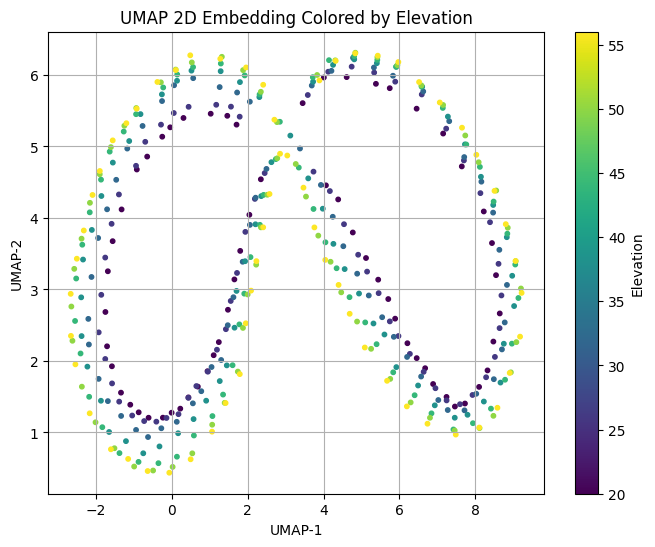

In [25]:
# STEP 3: Plot the 2D embedding by elevation
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=elevations, cmap='viridis', s=10)
plt.colorbar(label='Elevation')
plt.title("UMAP 2D Embedding Colored by Elevation")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()


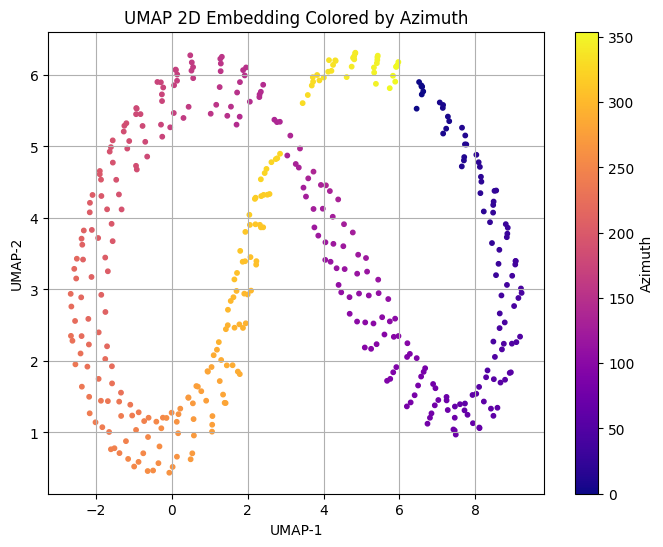

In [26]:
# STEP 4: Optional — Color by azimuth
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=azimuths, cmap='plasma', s=10)
plt.colorbar(label='Azimuth')
plt.title("UMAP 2D Embedding Colored by Azimuth")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()